In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt

#Load Dataset
df = pd.read_csv("Scholarship_Approval_500_Students.csv")


In [2]:
df.keys()

Index(['Student_ID', 'GPA', 'Family_Income', 'Attendance_Rate',
       'Extracurricular_Score', 'Community_Service_Hours',
       'Recommendation_Strength', 'Previous_Scholarship',
       'Scholarship_Approved'],
      dtype='object')

In [3]:
print(df.Scholarship_Approved)

0      0
1      0
2      0
3      0
4      0
      ..
495    0
496    0
497    0
498    1
499    0
Name: Scholarship_Approved, Length: 500, dtype: int64


In [4]:
print(df)

    Student_ID   GPA  Family_Income  Attendance_Rate  Extracurricular_Score  \
0       STU001  2.75          67605               66                      6   
1       STU002  3.90         141790               67                      4   
2       STU003  3.46         125616               74                      9   
3       STU004  3.20          58088               88                      8   
4       STU005  2.31          98752               92                      2   
..         ...   ...            ...              ...                    ...   
495     STU496  2.71          31302               72                      2   
496     STU497  3.17          87506               84                      3   
497     STU498  2.16          61157               95                      6   
498     STU499  3.95          74917               86                      9   
499     STU500  3.97         112738               97                      8   

     Community_Service_Hours Recommendation_Strengt

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Student_ID               500 non-null    object 
 1   GPA                      500 non-null    float64
 2   Family_Income            500 non-null    int64  
 3   Attendance_Rate          500 non-null    int64  
 4   Extracurricular_Score    500 non-null    int64  
 5   Community_Service_Hours  500 non-null    int64  
 6   Recommendation_Strength  500 non-null    object 
 7   Previous_Scholarship     500 non-null    object 
 8   Scholarship_Approved     500 non-null    int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 35.3+ KB


In [6]:
# Handling Missing Value
print(df.isnull().sum())

Student_ID                 0
GPA                        0
Family_Income              0
Attendance_Rate            0
Extracurricular_Score      0
Community_Service_Hours    0
Recommendation_Strength    0
Previous_Scholarship       0
Scholarship_Approved       0
dtype: int64


In [7]:
# Encode categorical columns

le=LabelEncoder()
df["Recommendation_Strength"]=le.fit_transform(df["Recommendation_Strength"])
df["Previous_Scholarship"]=le.fit_transform(df["Previous_Scholarship"])
# Scale Numerical Feature
scaler=StandardScaler()
numerical_cols=["GPA","Family_Income","Attendance_Rate","Extracurricular_Score","Community_Service_Hours"]
df[numerical_cols]=scaler.fit_transform(df[numerical_cols])

In [8]:
# drop the column
X=df.drop(["Student_ID","Scholarship_Approved"],axis=1)
y=df["Scholarship_Approved"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [9]:
# Train The model
model=RandomForestClassifier(n_estimators=150,random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

Accuracy: 0.99

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        90
           1       1.00      0.90      0.95        10

    accuracy                           0.99       100
   macro avg       0.99      0.95      0.97       100
weighted avg       0.99      0.99      0.99       100


Confusion Matrix:
 [[90  0]
 [ 1  9]]


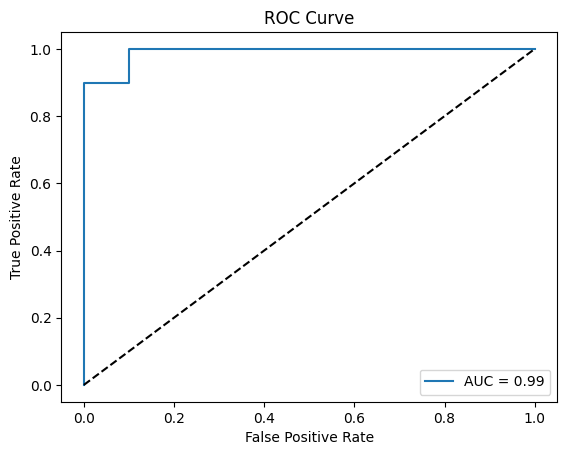

In [10]:
# Evaluate The Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
print("Accuracy:", round(accuracy_score(y_test, y_pred),3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC-AUC
y_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


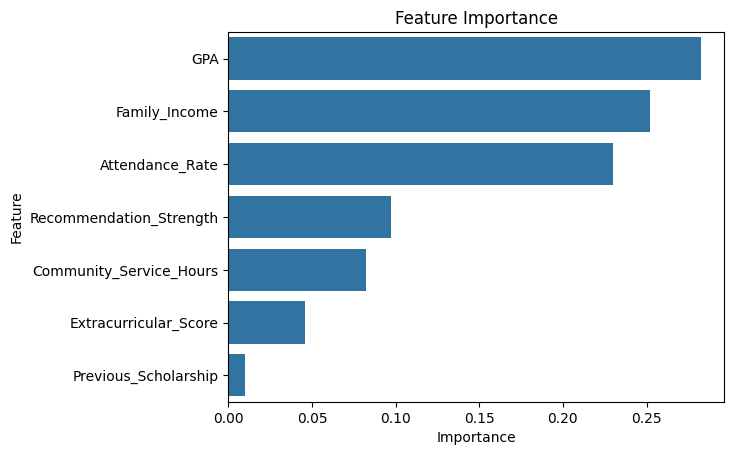

In [11]:
import seaborn as sns

# Feature Importance
feat_imp = pd.DataFrame({"Feature": X.columns, "Importance": model.feature_importances_}).sort_values(by="Importance", ascending=False)
sns.barplot(x="Importance", y="Feature", data=feat_imp)
plt.title("Feature Importance")
plt.show()

 

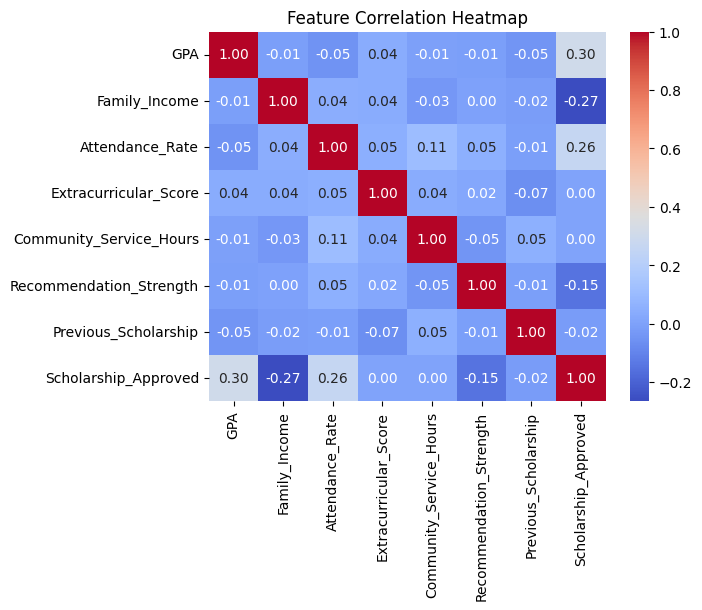

In [12]:
# Correlation Heatmap
numeric_df=df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [15]:
# Example student input (scaled if needed)
sample = np.array([[3.8, 40000, 90, 8, 60, le.fit_transform(["Strong"])[0], le.fit_transform(["No"])[0]]])
sample_scaled = scaler.transform(sample[:,:5].astype(float))  # scale numerical columns
sample[:, :5] = sample_scaled
prediction = model.predict(sample)
print("🎓 Scholarship Approved!" if prediction[0]==1 else "❌ Scholarship Rejected!")


🎓 Scholarship Approved!


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
